# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# **Read Dataset**

In [ ]:
dataset = pd.read_csv('boston.csv')


In [ ]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# **Check missing values**

In [ ]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# **Plotting the correlation between all features**

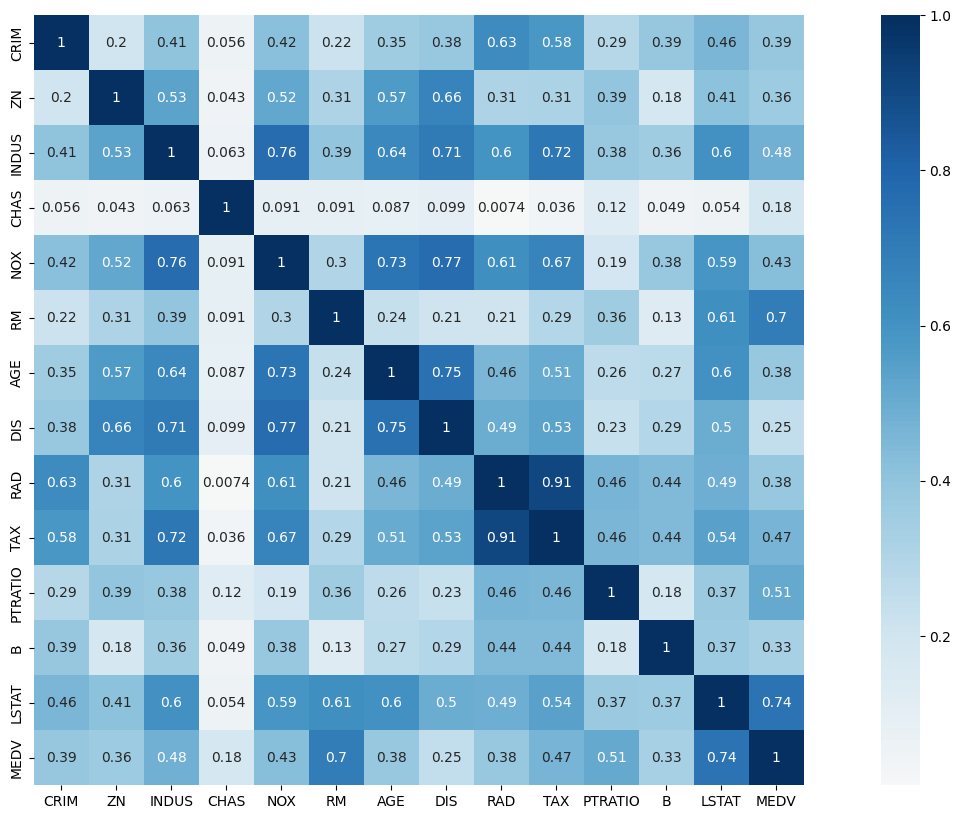

In [ ]:
plt.figure(figsize=(20, 10))
cmap = 'RdBu'
sns.heatmap(dataset.corr().abs(), cmap=cmap, center=0, square=True, annot=True)
plt.show()

# **Visually we can see RAD and TAX are highly correlated**

# **We can choose the below features for a threshold=0.4 and plot the correlation with our target MEDV**

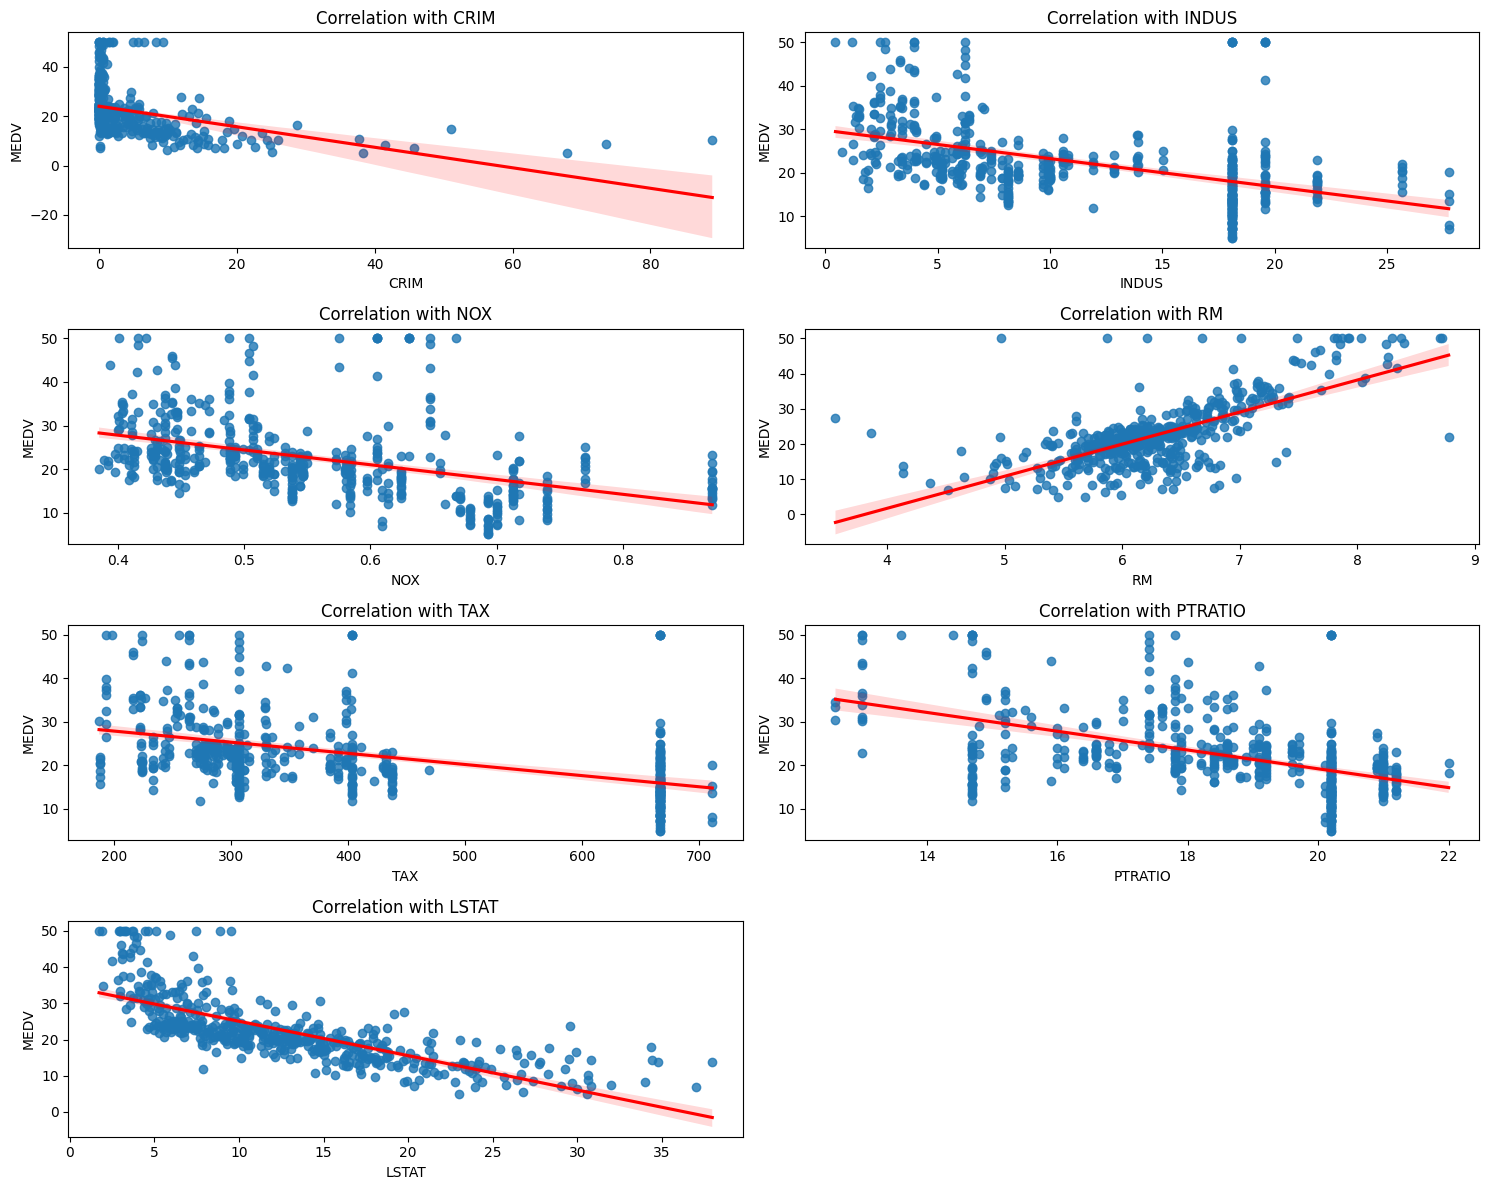

In [ ]:
X = dataset[['CRIM','INDUS', 'NOX', 'RM', 'TAX','PTRATIO','LSTAT']]
y = dataset['MEDV']

num_features = X.shape[1]
plt.figure(figsize=(15, 12))
for i, feature in enumerate(X.columns):
    plt.subplot(4, 2, i + 1)
    sns.regplot(x=X[feature], y=y, line_kws={'color': 'red'})
    plt.title(f'Correlation with {feature}')

plt.tight_layout()
plt.show()


# **Plottings to detect outliers**

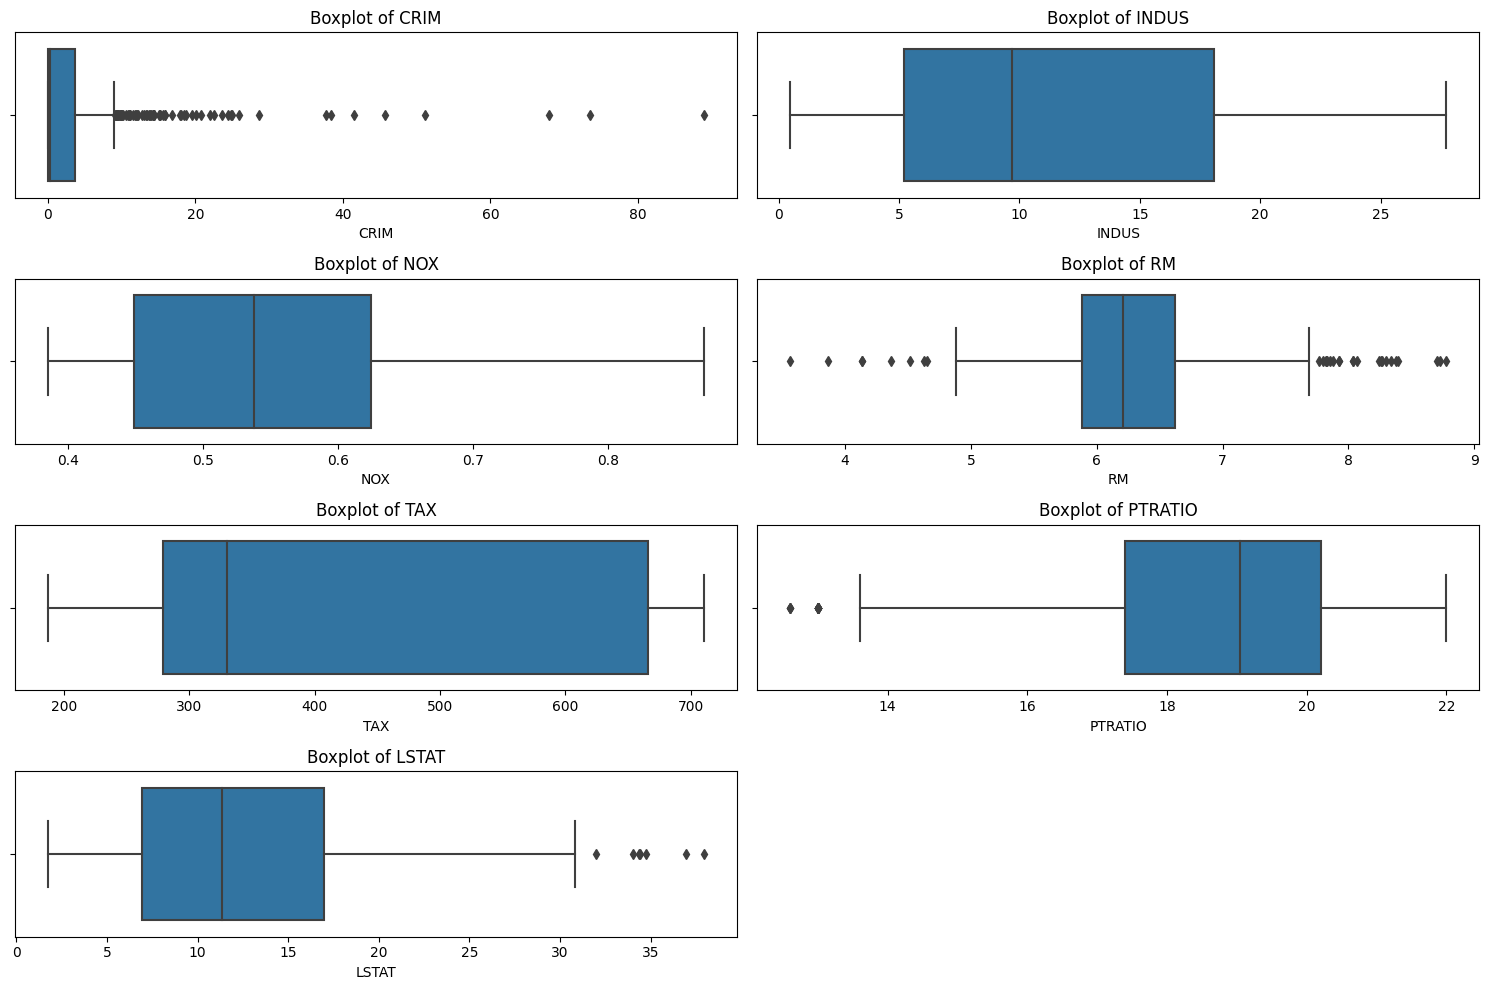

In [ ]:
# Box plots for numerical features with outliers
plt.figure(figsize=(15, 10))

for i, column in enumerate(X.columns):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=X[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


# **Removing outliers for "RM"**

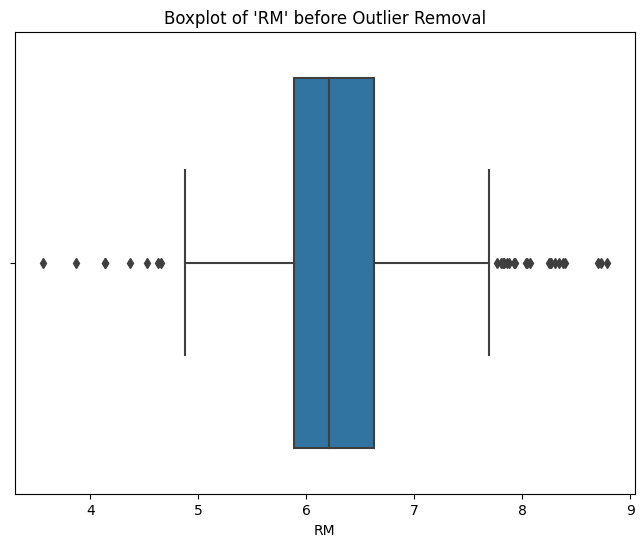

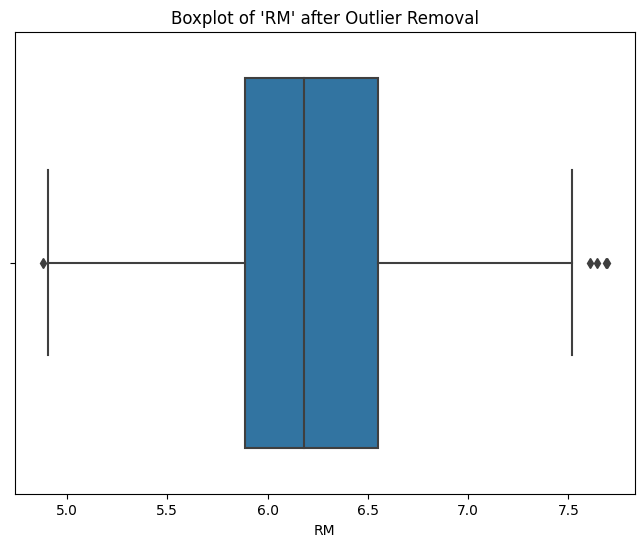

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=X['RM'])
plt.title("Boxplot of 'RM' before Outlier Removal")
plt.show()

Q1 = X['RM'].quantile(0.25)
Q3 = X['RM'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_before_removal = (X['RM'] < lower_bound) | (X['RM'] > upper_bound)

X_no_outliers = X[~outliers_before_removal]
y_no_outliers = y[~outliers_before_removal]

plt.figure(figsize=(8, 6))
sns.boxplot(x=X_no_outliers['RM'])
plt.title("Boxplot of 'RM' after Outlier Removal")
plt.show()


# **Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (380, 7)
X_test shape: (96, 7)
y_train shape: (380,)
y_test shape: (96,)


In [ ]:
X_train.describe()

,CRIM,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,3.479918,11.324816,0.555065,6.221682,407.789474,18.571579,12.973737
std,8.004211,6.851691,0.115858,0.540219,168.873164,2.085870,6.949152
min,0.009060,1.250000,0.389000,4.880000,187.000000,12.600000,1.730000
25%,0.082598,5.560000,0.453000,5.878750,279.000000,17.400000,7.492500
50%,0.252775,9.690000,0.538000,6.167000,330.000000,19.100000,11.995000
75%,3.716458,18.100000,0.624000,6.546750,666.000000,20.200000,17.152500
max,73.534100,27.740000,0.871000,7.691000,711.000000,22.000000,34.770000


In [ ]:
print(X_train.columns)

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')


# **Different models**

In [ ]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression MSE:", mse_linear)

# SVM
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("SVM MSE:", mse_svm)

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Decision Tree MSE:", mse_dt)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest MSE:", mse_rf)

# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost MSE:", mse_xgb)


Linear Regression MSE: 17.111437964994376
SVM MSE: 44.0107511379833
Decision Tree MSE: 19.09447916666667
Random Forest MSE: 9.361284937500011
XGBoost MSE: 12.976971681166384


# **Final Results shows the best model: Random forest with least MSE**

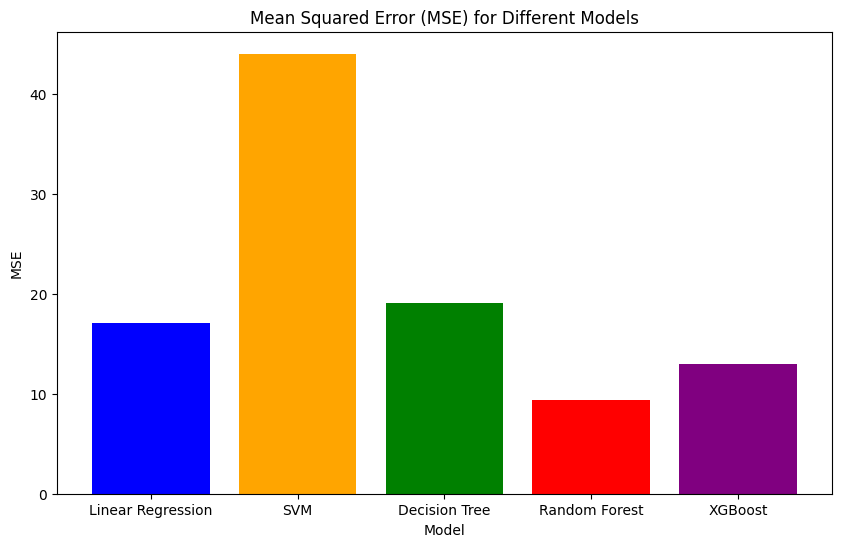

In [ ]:
import matplotlib.pyplot as plt

mse_values = [mse_linear, mse_svm, mse_dt, mse_rf, mse_xgb]

model_names = ['Linear Regression', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost']

plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Mean Squared Error (MSE) for Different Models')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.show()

